In [33]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [34]:
PROCESSED_DATA_DIR = Path("../data/1_processed/")

In [35]:
df = pd.read_parquet(PROCESSED_DATA_DIR / "hungary.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 165496 entries, 2022-10-01 00:05:52 to 2023-09-26 07:29:43
Data columns (total 40 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Boiler Pump Modulator                     20904 non-null   Int64         
 1   Fan Modulator Output PWM2                 16533 non-null   Int64         
 2   Boiler Flow T                             76065 non-null   Int64         
 3   Boiler return T                           76099 non-null   Int64         
 4   Fan RPM Measure                           35216 non-null   Int64         
 5   SAFETY Rame Value                         32531 non-null   Int64         
 6   Room Temperature 1                        32557 non-null   Int64         
 7   CH enable                                 871 non-null     Int64         
 8   DHW enable                                871 non-null     I

In [36]:
df.head()

,Boiler Pump Modulator,Fan Modulator Output PWM2,Boiler Flow T,Boiler return T,Fan RPM Measure,SAFETY Rame Value,Room Temperature 1,CH enable,DHW enable,thermoregulation Active,...,Boiler Fan Cycles - LOW,CH Flame On Counter - LOW,Boiler DHW Flame On Counter - LOW,Flame On Counter - LOW,Boiler Cons CH GasEnergy (kW10s) - HIGH,Boiler Cons DHW GasEnergy (kW10s) - HIGH,Life Time,BOILER_Cons_CH_EleEnergy (kW10s) - LOW,BOILER Cons DHW EleEnergy (kW10s) - LOW,datetime
Timestamp,,,,,,,,,,,,,,,,,,,,,
2022-10-01 00:05:52,<NA>,<NA>,529,501,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2022-10-01 00:05:52
2022-10-01 00:09:54,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2022-10-01 00:09:54
2022-10-01 00:12:01,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2022-10-01 00:12:01
2022-10-01 00:12:57,<NA>,<NA>,<NA>,<NA>,0,1,230,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2022-10-01 00:12:57
2022-10-01 00:15:08,<NA>,<NA>,515,482,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2022-10-01 00:15:08


<Axes: >

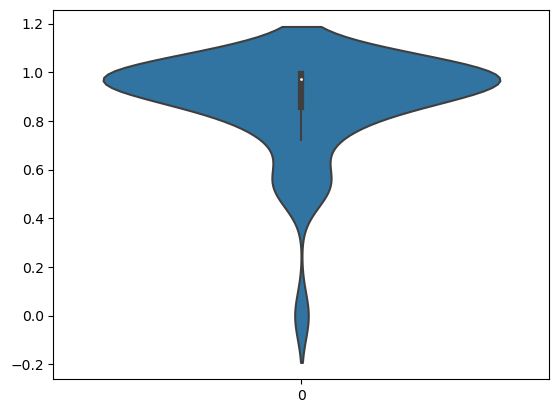

In [37]:
sns.violinplot(df.isna().mean())

(721, 39)
Boiler Gas Type            0.271845
Boiler Fan Cycles - LOW    0.825243
dtype: float64


/tmp/ipykernel_1333/1005414123.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resampled_df = df.resample("12h").mean()


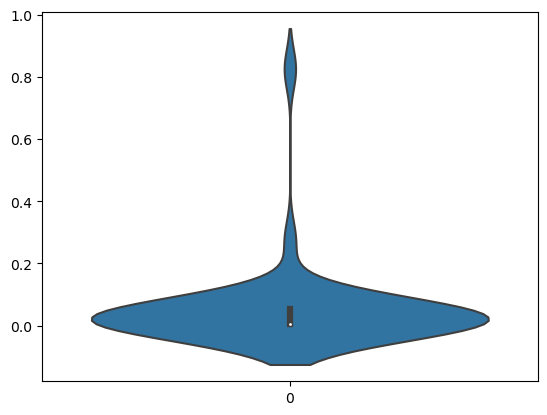

In [38]:
resampled_df = df.resample("12h").mean()
resampled_df_na = resampled_df.isna().mean()
print(resampled_df.shape)
sns.violinplot(resampled_df_na)
print(resampled_df_na[resampled_df_na > 0.1])

In [39]:
resampled_df

,Boiler Pump Modulator,Fan Modulator Output PWM2,Boiler Flow T,Boiler return T,Fan RPM Measure,SAFETY Rame Value,Room Temperature 1,CH enable,DHW enable,thermoregulation Active,...,Boiler Fan On time (h) - LOW,Boiler Fan Cycles - LOW,CH Flame On Counter - LOW,Boiler DHW Flame On Counter - LOW,Flame On Counter - LOW,Boiler Cons CH GasEnergy (kW10s) - HIGH,Boiler Cons DHW GasEnergy (kW10s) - HIGH,Life Time,BOILER_Cons_CH_EleEnergy (kW10s) - LOW,BOILER Cons DHW EleEnergy (kW10s) - LOW
Timestamp,,,,,,,,,,,,,,,,,,,,,
2022-10-01 00:00:00,21.521739,21.0,488.188889,465.255556,596.282051,15.333333,228.333333,1.0,1.0,0.0,...,6412.0,89602.5,15739.0,21546.5,61895.0,18047151.0,4164889.0,43024.0,79052.0,18366.0
2022-10-01 12:00:00,16.5,10.944444,521.337209,485.581395,360.638889,10.333333,228.861111,1.0,1.0,0.0,...,6412.4,89643.0,15739.0,21553.2,61911.2,18047151.0,4165677.0,43033.0,79052.0,18370.0
2022-10-02 00:00:00,25.25,17.285714,463.645161,412.344086,494.358974,13.74359,226.871795,1.0,1.0,0.0,...,6413.0,89658.0,15740.0,21555.5,61919.75,18047202.0,4166919.0,43046.0,79052.0,18376.0
2022-10-02 12:00:00,27.6,33.772727,466.951923,412.211538,1129.818182,33.045455,225.772727,1.0,1.0,0.0,...,6413.714286,89676.285714,15743.0,21559.142857,61931.571429,18049198.0,4168550.0,43058.0,79060.0,18385.0
2022-10-03 00:00:00,4.5,8.888889,470.289157,444.048193,186.828571,3.314286,227.114286,1.0,1.0,0.0,...,6415.0,89690.0,15745.0,21560.75,61940.5,18053823.0,4170419.0,43072.0,79079.0,18393.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-24 00:00:00,12.375,11.15,407.356322,380.448276,295.533333,8.594595,229.918919,0.0,1.0,0.0,...,7466.666667,<NA>,18201.0,24364.833333,71705.666667,21066985.0,5098691.0,51519.0,91862.0,22261.0
2023-09-24 12:00:00,8.608696,12.944444,448.632184,406.091954,222.72093,7.078947,233.289474,0.0,1.0,0.0,...,7467.0,<NA>,18201.0,24368.75,71714.25,21066985.0,5099207.0,51531.0,91862.0,22264.0
2023-09-25 00:00:00,8.608696,12.277778,414.216867,371.686747,162.952381,6.472222,230.972222,0.0,1.0,0.0,...,7467.0,<NA>,18201.0,24371.2,71720.2,21066985.0,5100460.0,51542.0,91862.0,22269.0


<Axes: >

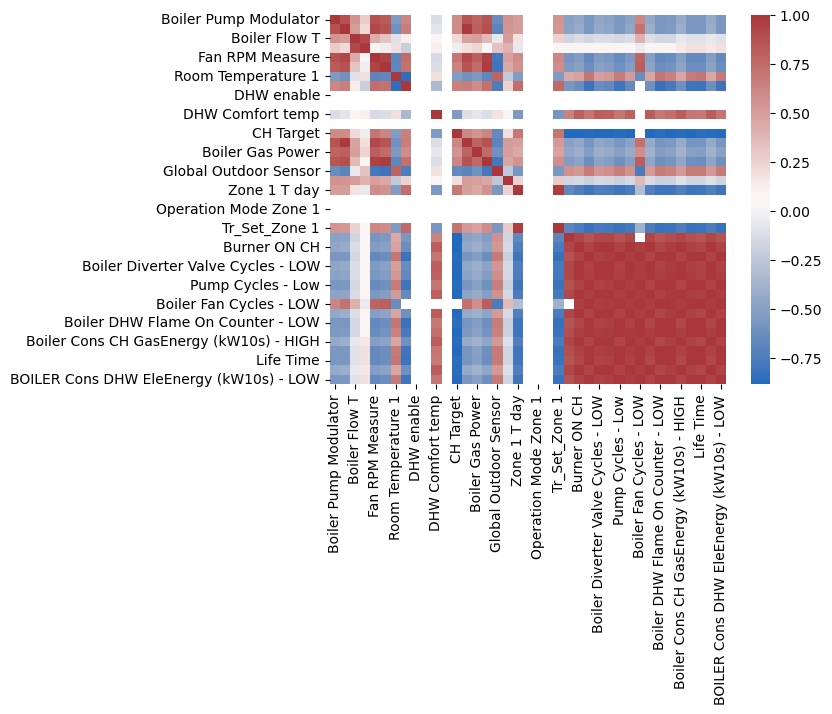

In [40]:
sns.heatmap(resampled_df.corr(), cmap="vlag")

<Axes: >

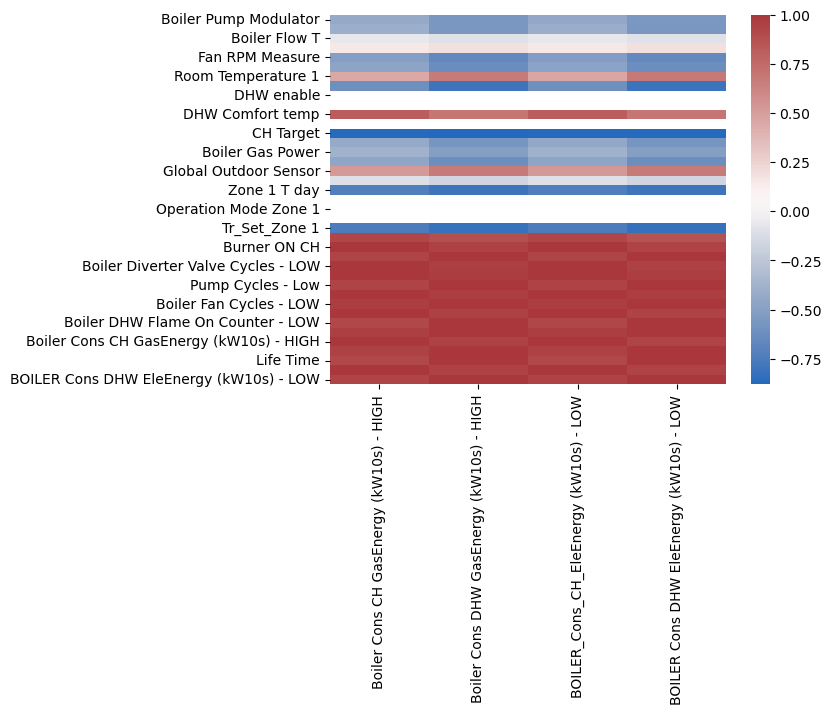

In [41]:
sns.heatmap(resampled_df.corr().filter(like="Cons"), cmap="vlag")

In [42]:
consumption_columns = (
    resampled_df.columns[
        resampled_df
        .columns
        .str.lower()
        .str.contains("cons")
    ]
).to_list()
consumption_columns

['Boiler Cons CH GasEnergy (kW10s) - HIGH',
 'Boiler Cons DHW GasEnergy (kW10s) - HIGH',
 'BOILER_Cons_CH_EleEnergy (kW10s) - LOW',
 'BOILER Cons DHW EleEnergy (kW10s) - LOW']

/usr/lib/python3.11/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/lib/python3.11/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/usr/lib/python3.11/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/lib/python3.11/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/usr/lib

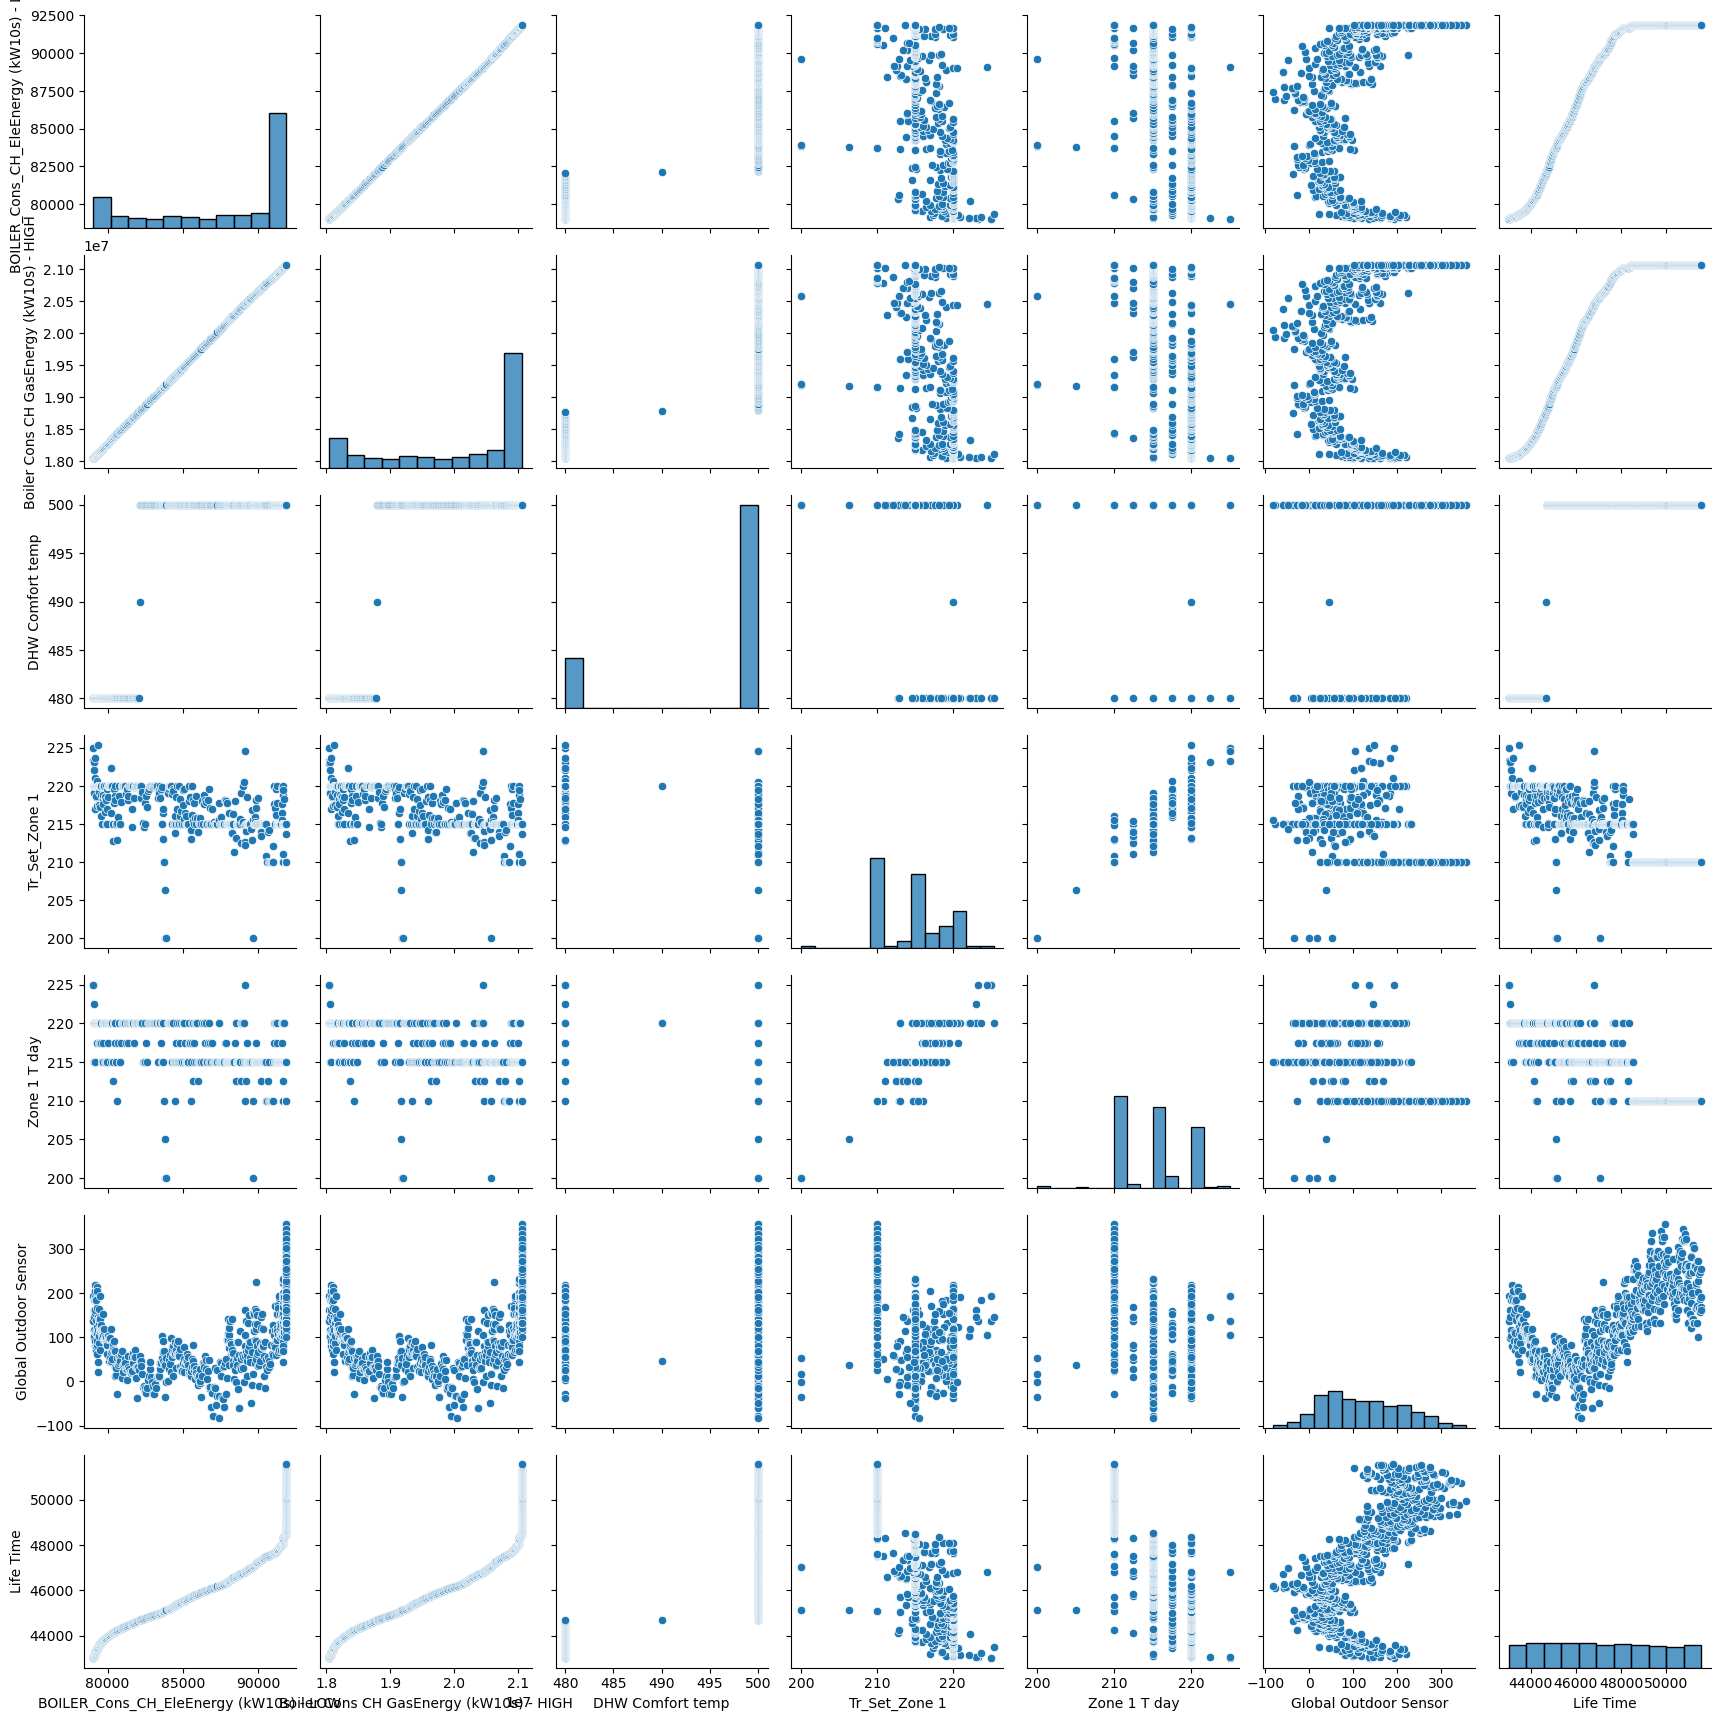

In [43]:
sns.pairplot(resampled_df[
    [
        "BOILER_Cons_CH_EleEnergy (kW10s) - LOW",
        "Boiler Cons CH GasEnergy (kW10s) - HIGH"
    ]
    + [
        "DHW Comfort temp",
        "Tr_Set_Zone 1",
        "Zone 1 T day",
        "Global Outdoor Sensor",
        "Life Time",
    ]
].dropna())

In [44]:
resampled_df[[
    "Boiler Cons CH GasEnergy (kW10s) - HIGH",
    "DHW Comfort temp",
    "Tr_Set_Zone 1",
    "Global Outdoor Sensor",
    "Life Time",
]].dropna().to_csv("data.csv", index=None)

## PCA

In [45]:
resampled_na_df: pd.DataFrame = (
    resampled_df
    .fillna(method="ffill")
)
resampled_na_df = resampled_na_df.drop(columns="Boiler Gas Type")
resampled_na_df

,Boiler Pump Modulator,Fan Modulator Output PWM2,Boiler Flow T,Boiler return T,Fan RPM Measure,SAFETY Rame Value,Room Temperature 1,CH enable,DHW enable,thermoregulation Active,...,Boiler Fan On time (h) - LOW,Boiler Fan Cycles - LOW,CH Flame On Counter - LOW,Boiler DHW Flame On Counter - LOW,Flame On Counter - LOW,Boiler Cons CH GasEnergy (kW10s) - HIGH,Boiler Cons DHW GasEnergy (kW10s) - HIGH,Life Time,BOILER_Cons_CH_EleEnergy (kW10s) - LOW,BOILER Cons DHW EleEnergy (kW10s) - LOW
Timestamp,,,,,,,,,,,,,,,,,,,,,
2022-10-01 00:00:00,21.521739,21.0,488.188889,465.255556,596.282051,15.333333,228.333333,1.0,1.0,0.0,...,6412.0,89602.5,15739.0,21546.5,61895.0,18047151.0,4164889.0,43024.0,79052.0,18366.0
2022-10-01 12:00:00,16.5,10.944444,521.337209,485.581395,360.638889,10.333333,228.861111,1.0,1.0,0.0,...,6412.4,89643.0,15739.0,21553.2,61911.2,18047151.0,4165677.0,43033.0,79052.0,18370.0
2022-10-02 00:00:00,25.25,17.285714,463.645161,412.344086,494.358974,13.74359,226.871795,1.0,1.0,0.0,...,6413.0,89658.0,15740.0,21555.5,61919.75,18047202.0,4166919.0,43046.0,79052.0,18376.0
2022-10-02 12:00:00,27.6,33.772727,466.951923,412.211538,1129.818182,33.045455,225.772727,1.0,1.0,0.0,...,6413.714286,89676.285714,15743.0,21559.142857,61931.571429,18049198.0,4168550.0,43058.0,79060.0,18385.0
2022-10-03 00:00:00,4.5,8.888889,470.289157,444.048193,186.828571,3.314286,227.114286,1.0,1.0,0.0,...,6415.0,89690.0,15745.0,21560.75,61940.5,18053823.0,4170419.0,43072.0,79079.0,18393.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-24 00:00:00,12.375,11.15,407.356322,380.448276,295.533333,8.594595,229.918919,0.0,1.0,0.0,...,7466.666667,92597.5,18201.0,24364.833333,71705.666667,21066985.0,5098691.0,51519.0,91862.0,22261.0
2023-09-24 12:00:00,8.608696,12.944444,448.632184,406.091954,222.72093,7.078947,233.289474,0.0,1.0,0.0,...,7467.0,92597.5,18201.0,24368.75,71714.25,21066985.0,5099207.0,51531.0,91862.0,22264.0
2023-09-25 00:00:00,8.608696,12.277778,414.216867,371.686747,162.952381,6.472222,230.972222,0.0,1.0,0.0,...,7467.0,92597.5,18201.0,24371.2,71720.2,21066985.0,5100460.0,51542.0,91862.0,22269.0


In [55]:
output_df = resampled_na_df.filter(like="Cons")
input_df = resampled_na_df[[
    "DHW Comfort temp",
    "Tr_Set_Zone 1",
    "Zone 1 T day",
    "Global Outdoor Sensor",
    "Life Time",
]]
print(
    output_df.columns,
    input_df.columns,
    sep="\n",
)

Index(['Boiler Cons CH GasEnergy (kW10s) - HIGH',
       'Boiler Cons DHW GasEnergy (kW10s) - HIGH',
       'BOILER_Cons_CH_EleEnergy (kW10s) - LOW',
       'BOILER Cons DHW EleEnergy (kW10s) - LOW'],
      dtype='object')
Index(['DHW Comfort temp', 'Tr_Set_Zone 1', 'Zone 1 T day',
       'Global Outdoor Sensor', 'Life Time'],
      dtype='object')


In [60]:
pca = PCA(n_components=1)
pca.fit(input_df)
pca.explained_variance_ratio_

array([0.99925933])

In [61]:
X_pca = pca.transform(input_df)
X_pca

array([[ 4.29246325e+03],
       [ 4.28210355e+03],
       [ 4.27046757e+03],
       [ 4.25785581e+03],
       [ 4.24425274e+03],
       [ 4.24424846e+03],
       [ 4.22239541e+03],
       [ 4.20894923e+03],
       [ 4.20894514e+03],
       [ 4.18630526e+03],
       [ 4.17831423e+03],
       [ 4.15917684e+03],
       [ 4.15083061e+03],
       [ 4.13747627e+03],
       [ 4.13747627e+03],
       [ 4.11383745e+03],
       [ 4.11384160e+03],
       [ 4.08934751e+03],
       [ 4.07860894e+03],
       [ 4.06408014e+03],
       [ 4.05213018e+03],
       [ 4.03839317e+03],
       [ 4.02715996e+03],
       [ 4.01741089e+03],
       [ 4.00811683e+03],
       [ 3.99099147e+03],
       [ 3.99099147e+03],
       [ 3.96940284e+03],
       [ 3.96091198e+03],
       [ 3.94484826e+03],
       [ 3.93387143e+03],
       [ 3.92071172e+03],
       [ 3.91165908e+03],
       [ 3.89866967e+03],
       [ 3.88839615e+03],
       [ 3.87689523e+03],
       [ 3.86220801e+03],
       [ 3.84742154e+03],
       [ 3.8

In [75]:
input_output_df = output_df["Boiler Cons CH GasEnergy (kW10s) - HIGH"].rename("output").copy().to_frame()
input_output_df["input"] = X_pca
input_output_df = (input_output_df - input_output_df.mean(axis="index")) / input_output_df.std()
input_output_df.describe()

,output,input
count,721.0,7.210000e+02
mean,0.0,-7.883969e-17
std,1.0,1.000000e+00
min,-1.91116,-1.716396e+00
25%,-0.822097,-8.724063e-01
50%,0.509404,-1.657616e-03
75%,0.852466,8.646601e-01
max,0.852466,1.734200e+00


In [78]:
first_quartile, third_quartile = input_output_df["output"].quantile((0.25, 0.75))
iqr = third_quartile - first_quartile
bin_width = 2 * iqr / (input_output_df.shape[0]**(1/3))
bin_width

0.3734963545526861

In [72]:
input_output_df.to_csv("data_pca_2.csv", index=None)

In [73]:
1 / (12 * 60 * 60)

2.3148148148148147e-05